# Investigating Student Performance in Exams
## Final Project - Brain Station Data Science Certificate 
Katherine Szelag

Data set consists of the marks secured by the students in various subjects. Analysis will seek to understand the influence of various factors (including gender and parental level of education) on student performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [2]:
examData = pd.read_csv("data/StudentsPerformance.csv")

## Initial exploration 

In [3]:
print(examData.shape)

(1000, 8)


In [4]:
examData.head()
# Data set is already indexed

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
examData.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# Random sampling of the data
examData.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
236,male,group D,bachelor's degree,free/reduced,none,63,66,67
206,male,group E,bachelor's degree,standard,none,82,62,62
944,female,group B,high school,standard,none,58,68,61
710,male,group C,some college,standard,completed,93,84,90
462,female,group E,some college,standard,none,71,70,76


In [7]:
# Shows the data types in the data set
examData.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
# Analysis of numerical values
examData.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Describe the non number data also
examData.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


## Prepping Data

In [10]:
# Checking if any values are null
examData.isnull().values.any()

False

In [11]:
# Checking if any values are null/ counts the number of null values
examData.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Renaming the columns in place

In [12]:
examData.rename(columns=({'gender':'Gender','race/ethnicity':'Race'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [13]:
# Renaming worked
for col in examData.columns:
    print(col)

Gender
Race
Parental_Level_of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


## Transforming the Dataframe

### Finding and appending an "Average Overall Score"

In [14]:
examData['Average_Overall_Score'] = examData[['Math_Score', 'Reading_Score', 'Writing_Score']].mean(axis=1)
examData.head()

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [15]:
examData.describe()

,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


### Appending a rank column (as a percentile)

In [16]:
examData['Percentile_%'] = examData['Average_Overall_Score'].rank(pct=True).apply(lambda x: x * 100)
examData.head()

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score,Percentile_%
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,61.75
1,female,group C,some college,standard,completed,69,90,88,82.333333,84.10
2,female,group B,master's degree,standard,none,90,95,93,92.666667,96.90
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,9.85
4,male,group C,some college,standard,none,76,78,75,76.333333,71.65


## General Exploration

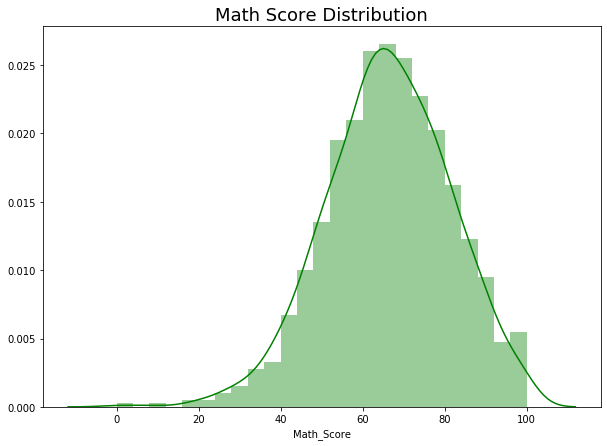

In [17]:
plt.figure(figsize=(10, 7))
sns.distplot(examData['Math_Score'], color = 'green')
plt.title('Math Score Distribution', fontsize=18)
plt.show()

In [18]:
stats.shapiro(examData['Math_Score'])

(0.9931508302688599, 0.0001453401637263596)

Reject the null hypothesis that Math Score is normally distributed. 

In [19]:
np.where(abs(stats.zscore(examData['Math_Score']))>3)

(array([ 17,  59, 787, 980]),)

In [20]:
examData['Math_Score'][17]

18

In [21]:
examData['Math_Score'][59]

0

In [22]:
examData['Math_Score'][787]

19

In [23]:
examData['Math_Score'][980]

8

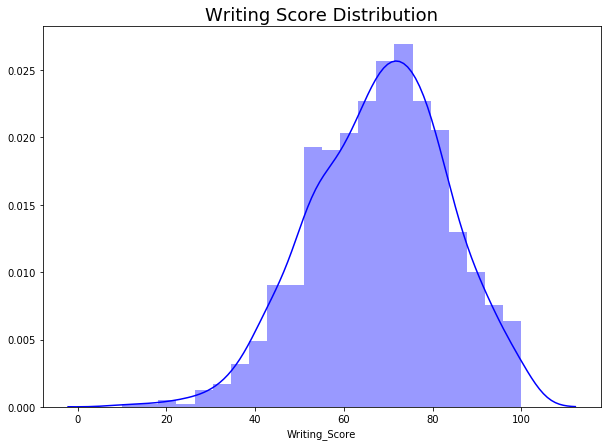

In [24]:
plt.figure(figsize=(10, 7))
sns.distplot(examData['Writing_Score'], color = 'blue')
plt.title('Writing Score Distribution', fontsize=18)
plt.show()

In [25]:
stats.shapiro(examData['Writing_Score'])

(0.9919633269309998, 2.9172901122365147e-05)

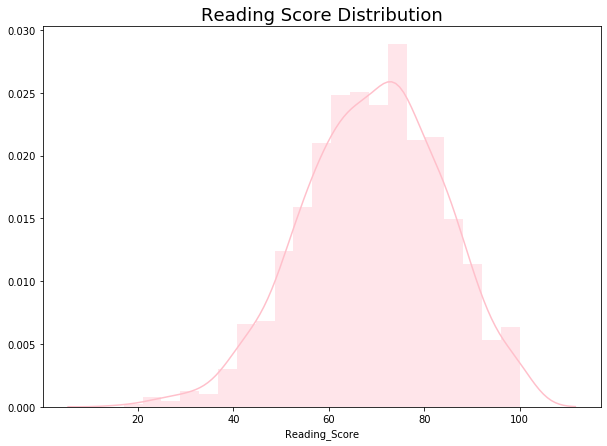

In [26]:
plt.figure(figsize=(10, 7))
sns.distplot(examData['Reading_Score'], color = 'pink')
plt.title('Reading Score Distribution', fontsize=18)
plt.show()

In [27]:
stats.shapiro(examData['Reading_Score'])

(0.9929210543632507, 0.0001056220498867333)

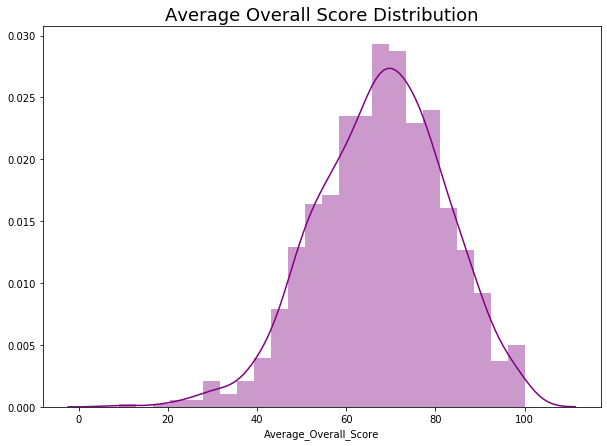

In [28]:
plt.figure(figsize=(10, 7))
sns.distplot(examData['Average_Overall_Score'], color = 'purple')
plt.title('Average Overall Score Distribution', fontsize=18)
plt.show()

In [29]:
stats.shapiro(examData['Average_Overall_Score'])

(0.9931490421295166, 0.00014498003292828798)

## Gender

In [30]:
examData['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

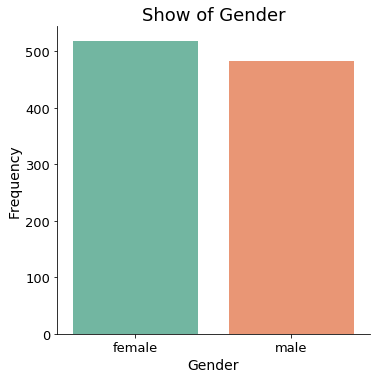

In [31]:
sns.catplot(data=examData, x='Gender', kind = 'count', order=['female', 'male'], palette="Set2")
plt.title('Show of Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.tick_params(labelsize=13)
plt.show()

### Scores by Gender

In [32]:
examData.groupby('Gender')[['Average_Overall_Score', 'Math_Score', 'Reading_Score', 'Writing_Score']].mean()

,Average_Overall_Score,Math_Score,Reading_Score,Writing_Score
Gender,,,,
female,69.569498,63.633205,72.608108,72.467181
male,65.837483,68.728216,65.473029,63.311203


 ### Math Score

In [33]:
stats.ttest_ind(examData.loc[examData['Gender']=="male", 'Math_Score'], examData.loc[examData['Gender']=="female", 'Math_Score'] )

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

The p-value is well below .001, so we reject the null hypothesis and conclude that the difference in the Math Score across Genders is statistically significant.

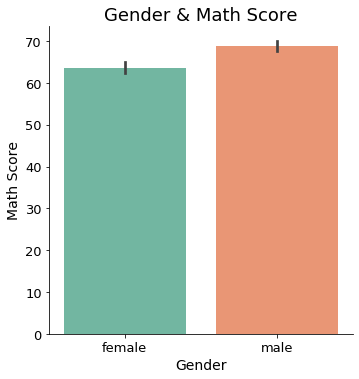

In [34]:
sns.catplot(data=examData, x='Gender', y = "Math_Score", kind = 'bar', order=['female', 'male'], palette="Set2")
plt.ylabel("Math Score", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Gender & Math Score', fontsize=18)
plt.show()

### Writing Score

In [35]:
stats.ttest_ind(examData.loc[examData['Gender']=="male", 'Writing_Score'], examData.loc[examData['Gender']=="female", 'Writing_Score'] )

Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)

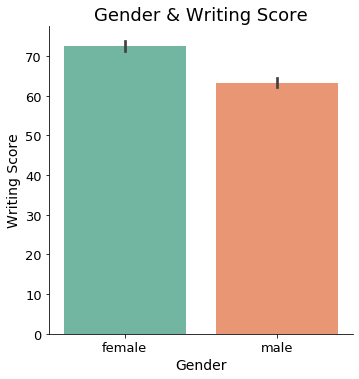

In [36]:
sns.catplot(data=examData, x='Gender', y = "Writing_Score", kind = 'bar', order=['female', 'male'], palette="Set2")
plt.ylabel("Writing Score", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Gender & Writing Score', fontsize=18)
plt.show()

### Reading Score

In [37]:
stats.ttest_ind(examData.loc[examData['Gender']=="male", 'Reading_Score'], examData.loc[examData['Gender']=="female", 'Reading_Score'] )

Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)

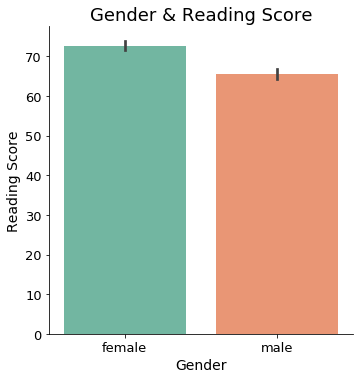

In [38]:
sns.catplot(data=examData, x='Gender', y = "Reading_Score", kind = 'bar', order=['female', 'male'], palette="Set2")
plt.ylabel("Reading Score", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Gender & Reading Score', fontsize=18)
plt.show()

### Average Overall Score by Gender

In [39]:
examData.groupby('Gender')['Average_Overall_Score'].mean()

Gender
female    69.569498
male      65.837483
Name: Average_Overall_Score, dtype: float64

In [40]:
stats.ttest_ind(examData.loc[examData['Gender']=="male", 'Average_Overall_Score'], examData.loc[examData['Gender']=="female", 'Average_Overall_Score'] )

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

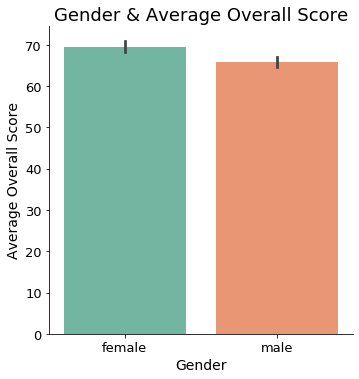

In [41]:
sns.catplot(data=examData, x='Gender', y = "Average_Overall_Score", kind = 'bar', order=['female', 'male'], palette="Set2")
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Gender & Average Overall Score', fontsize=18)
plt.show()

### High-achievers by Gender 

In [42]:
highAcheiverFemales = examData.loc[(examData['Average_Overall_Score'] >= 90) & (examData["Gender"] == 'female')]

In [43]:
totalFemaleHighAcheiver = highAcheiverFemales.agg(len)
totalFemaleHighAcheiver

Gender                         38
Race                           38
Parental_Level_of_Education    38
Lunch                          38
Test_Preparation_Course        38
Math_Score                     38
Reading_Score                  38
Writing_Score                  38
Average_Overall_Score          38
Percentile_%                   38
dtype: int64

In [44]:
highAcheiverMales = examData.loc[(examData['Average_Overall_Score'] >= 90) & (examData["Gender"] == 'male')]

In [45]:
totalMaleHighAcheiver = highAcheiverMales.agg(len)
totalMaleHighAcheiver

Gender                         14
Race                           14
Parental_Level_of_Education    14
Lunch                          14
Test_Preparation_Course        14
Math_Score                     14
Reading_Score                  14
Writing_Score                  14
Average_Overall_Score          14
Percentile_%                   14
dtype: int64

In [46]:
examData['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [47]:
# normalizing to total number of females
percent_of_female_high_acheiver = (38 / 518) * 100
percent_of_female_high_acheiver

7.335907335907336

In [48]:
# normalizing to total number of males
percent_of_male_high_acheiver = (14 / 482) * 100
percent_of_male_high_acheiver

2.904564315352697

#### 7.3% of females are high-achievers as compared to 2.9% of males.

In [49]:
highAchievers = examData['Average_Overall_Score'] >= 90

In [50]:
examData[highAchievers].groupby('Gender')['Average_Overall_Score'].mean()

Gender
female    94.649123
male      93.809524
Name: Average_Overall_Score, dtype: float64

## Race/Ethinicity

In [51]:
# Returns the unique values present in the Race/Ethnicity column
examData['Race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [52]:
# Returns the counts of Race/Ethinicty values
examData['Race'].value_counts(dropna=False, normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: Race, dtype: float64

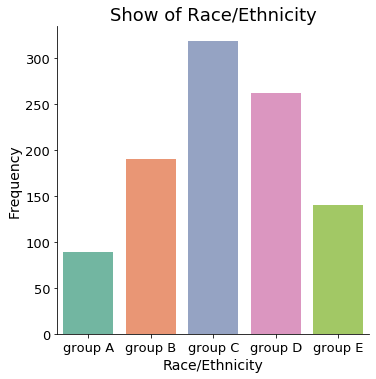

In [53]:
sns.catplot(data=examData, x='Race', kind = 'count', order=['group A', 'group B', 'group C', 'group D', 'group E'], palette="Set2")
plt.xlabel('Race/Ethnicity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Show of Race/Ethnicity', fontsize=18)
plt.tick_params(labelsize=13)
plt.show()

### Mean Math Score by Race/Ethnicity

In [54]:
examData.groupby('Race')[['Average_Overall_Score', 'Math_Score', 'Reading_Score', 'Writing_Score']].mean()

,Average_Overall_Score,Math_Score,Reading_Score,Writing_Score
Race,,,,
group A,62.992509,61.629213,64.674157,62.674157
group B,65.468421,63.452632,67.352632,65.600000
group C,67.131661,64.463950,69.103448,67.827586
group D,69.179389,67.362595,70.030534,70.145038
group E,72.752381,73.821429,73.028571,71.407143


In [55]:
stats.f_oneway(examData.loc[examData['Race']=="group A", 'Math_Score'], examData.loc[examData['Race']=="group B", 'Math_Score'],  examData.loc[examData['Race']=="group C", 'Math_Score'],  examData.loc[examData['Race']=="group D", 'Math_Score'],  examData.loc[examData['Race']=="group E", 'Math_Score'])

F_onewayResult(statistic=14.593885166332635, pvalue=1.3732194030370688e-11)

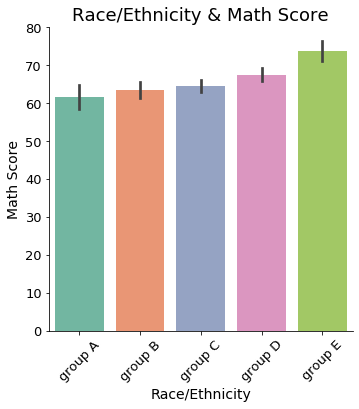

In [56]:
sns.catplot(data=examData, x='Race', y='Math_Score', kind = 'bar', order=['group A', 'group B', 'group C', 'group D', 'group E'], palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Math Score", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Race/Ethnicity & Math Score', fontsize=18)
plt.show()

### Average Overall Score by Race/Ethnicity

In [57]:
examData.groupby(['Race'])['Average_Overall_Score'].mean()

Race
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: Average_Overall_Score, dtype: float64

In [58]:
stats.f_oneway(examData.loc[examData['Race']=="group A", 'Average_Overall_Score'], examData.loc[examData['Race']=="group B", 'Average_Overall_Score'],  examData.loc[examData['Race']=="group C", 'Average_Overall_Score'],  examData.loc[examData['Race']=="group D", 'Average_Overall_Score'],  examData.loc[examData['Race']=="group E", 'Average_Overall_Score'])

F_onewayResult(statistic=9.09605231339089, pvalue=3.2258693161040875e-07)

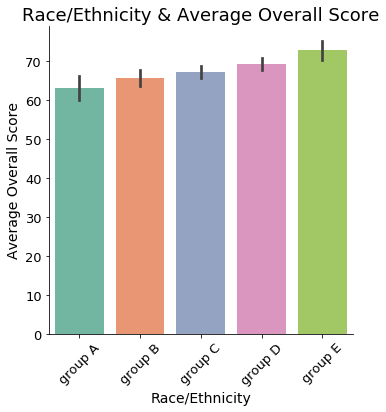

In [59]:
sns.catplot(data=examData, x='Race', y='Average_Overall_Score', kind = 'bar', order=['group A', 'group B', 'group C', 'group D', 'group E'], palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Race/Ethnicity & Average Overall Score', fontsize=18)
plt.show()

### Average Overall Score by Race/Ethnicity & Gender

In [60]:
examData.groupby(['Race', 'Gender'])['Average_Overall_Score'].mean()

Race     Gender
group A  female    65.129630
         male      61.540881
group B  female    67.509615
         male      63.000000
group C  female    68.585185
         male      65.249400
group D  female    71.439276
         male      66.987469
group E  female    74.062802
         male      71.478873
Name: Average_Overall_Score, dtype: float64

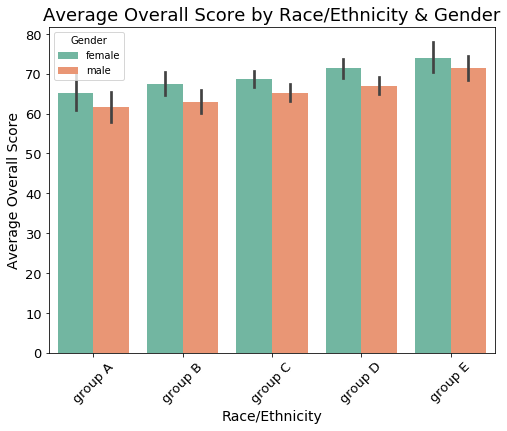

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(data=examData, x='Race', y='Average_Overall_Score',hue= 'Gender', order=['group A', 'group B', 'group C', 'group D', 'group E'], palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Average Overall Score by Race/Ethnicity & Gender', fontsize=18)
plt.show()

## Parental Level of Education 

In [62]:
# Average Overall Score by Parental Level of Education
examData.groupby('Parental_Level_of_Education')[['Average_Overall_Score', 'Math_Score', 'Reading_Score', 'Writing_Score']].mean()

,Average_Overall_Score,Math_Score,Reading_Score,Writing_Score
Parental_Level_of_Education,,,,
associate's degree,69.569069,67.882883,70.927928,69.896396
bachelor's degree,71.923729,69.389831,73.000000,73.381356
high school,63.096939,62.137755,64.704082,62.448980
master's degree,73.598870,69.745763,75.372881,75.677966
some college,68.476401,67.128319,69.460177,68.840708
some high school,65.108007,63.497207,66.938547,64.888268


In [63]:
stats.f_oneway(examData.loc[examData['Parental_Level_of_Education']=="associate's degree", 'Average_Overall_Score'], examData.loc[examData['Parental_Level_of_Education']=="bachelor's degree", 'Average_Overall_Score'],  examData.loc[examData['Parental_Level_of_Education']=="high school", 'Average_Overall_Score'],  examData.loc[examData['Parental_Level_of_Education']=="master's degree", 'Average_Overall_Score'],examData.loc[examData['Parental_Level_of_Education']=="some college", 'Average_Overall_Score'], examData.loc[examData['Parental_Level_of_Education']=="some high school", 'Average_Overall_Score'])

F_onewayResult(statistic=10.75314696233657, pvalue=4.3810464809431664e-10)

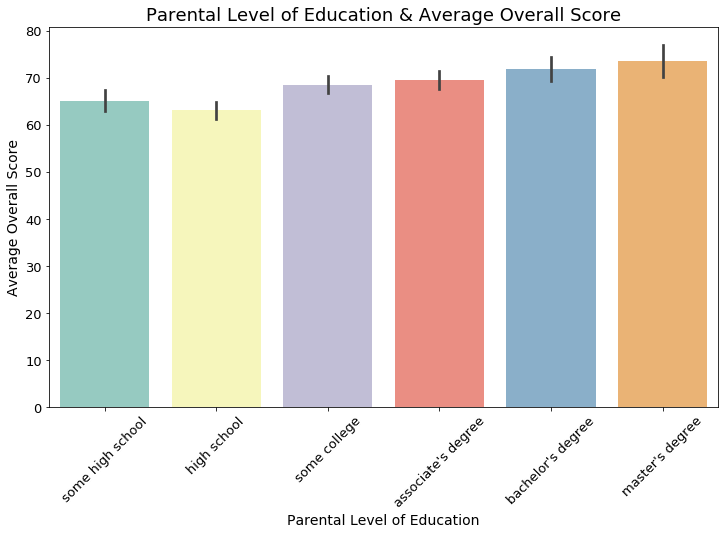

In [64]:
plt.figure(figsize=(12,7))
sns.barplot(x = "Parental_Level_of_Education", y = "Average_Overall_Score", data = examData, palette="Set3", order=['some high school', 'high school', 'some college',"associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Parental Level of Education", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Parental Level of Education & Average Overall Score', fontsize=18)
plt.show()

Seems like it is better to have some high school than having actually graduated.

### Parental Degree

In [65]:
examData['Parental_Degree'] = np.where((examData["Parental_Level_of_Education"]=='some high school') | (examData["Parental_Level_of_Education"]=='high school'), False, True)

In [66]:
examData.head()

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score,Percentile_%,Parental_Degree
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,61.75,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,84.10,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,96.90,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,9.85,True
4,male,group C,some college,standard,none,76,78,75,76.333333,71.65,True


In [67]:
examData['Parental_Degree'].value_counts()

True     625
False    375
Name: Parental_Degree, dtype: int64

In [68]:
examData.groupby('Parental_Degree')[['Average_Overall_Score', 'Math_Score', 'Reading_Score', 'Writing_Score']].mean()

,Average_Overall_Score,Math_Score,Reading_Score,Writing_Score
Parental_Degree,,,,
False,64.056889,62.786667,65.770667,63.613333
True,69.998933,68.070400,71.208000,70.718400


In [69]:
stats.ttest_ind(examData.loc[examData['Parental_Degree']==True, 'Average_Overall_Score'], examData.loc[examData['Parental_Degree']==False, 'Average_Overall_Score'] )

Ttest_indResult(statistic=6.511340023301549, pvalue=1.178126725839568e-10)

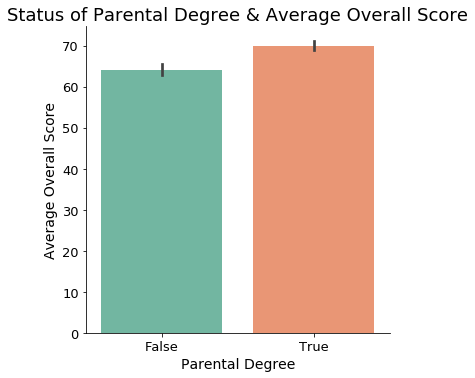

In [70]:
sns.catplot(data=examData, x='Parental_Degree', y = "Average_Overall_Score", kind = 'bar', palette="Set2")
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Parental Degree", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Status of Parental Degree & Average Overall Score', fontsize=18)
plt.show()

## Lunch

In [71]:
examData.groupby('Lunch')['Average_Overall_Score'].mean()

Lunch
free/reduced    62.199061
standard        70.837209
Name: Average_Overall_Score, dtype: float64

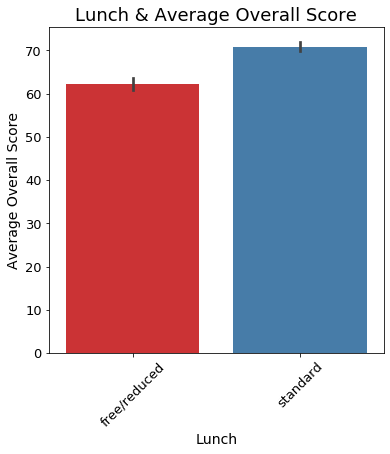

In [72]:
plt.figure(figsize=(6,6))
sns.barplot(x = "Lunch", y = "Average_Overall_Score", data = examData, palette="Set1", order=['free/reduced', 'standard'])
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Lunch", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Lunch & Average Overall Score', fontsize=18)
plt.show()

In [73]:
examData.groupby(['Gender', 'Lunch']).count()

Race  Parental_Level_of_Education  \
Gender Lunch                                             
female free/reduced   189                          189   
       standard       329                          329   
male   free/reduced   166                          166   
       standard       316                          316   

                     Test_Preparation_Course  Math_Score  Reading_Score  \
Gender Lunch                                                              
female free/reduced                      189         189            189   
       standard                          329         329            329   
male   free/reduced                      166         166            166   
       standard                          316         316            316   

                     Writing_Score  Average_Overall_Score  Percentile_%  \
Gender Lunch                                                              
female free/reduced            189                    189           189   
       standard                329                    329           329   
male   free/reduced            166                    166           166   
       standard                316                    316           316   

                     Parental_Degree  
Gender Lunch                          
female free/reduced              189  
       standard                  329  
male   free/reduced              166  
       standard                  316

In [74]:
examData['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [75]:
percentFreeLunchFemales = 189 / 518 * 100
percentFreeLunchFemales

36.486486486486484

In [76]:
percentFreeLunchMales = 166 / 482 * 100
percentFreeLunchMales

34.439834024896264

A greater percentage of females are on a free/reduced lunch program.

## Test Preparation Course

In [77]:
examData['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [78]:
examData.groupby('Test_Preparation_Course')['Average_Overall_Score'].mean()

Test_Preparation_Course
completed    72.669460
none         65.038941
Name: Average_Overall_Score, dtype: float64

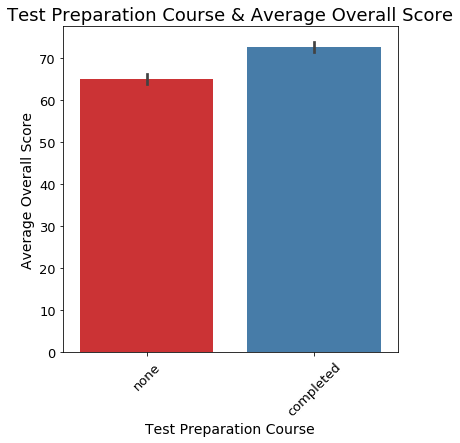

In [79]:
plt.figure(figsize=(6,6))
sns.barplot(x = "Test_Preparation_Course", y = "Average_Overall_Score", data = examData, palette="Set1")
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("Test Preparation Course", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Test Preparation Course & Average Overall Score', fontsize=18)
plt.show()

In [80]:
examData.groupby(['Gender', 'Test_Preparation_Course']).count()

Race  Parental_Level_of_Education  Lunch  \
Gender Test_Preparation_Course                                             
female completed                 184                          184    184   
       none                      334                          334    334   
male   completed                 174                          174    174   
       none                      308                          308    308   

                                Math_Score  Reading_Score  Writing_Score  \
Gender Test_Preparation_Course                                             
female completed                       184            184            184   
       none                            334            334            334   
male   completed                       174            174            174   
       none                            308            308            308   

                                Average_Overall_Score  Percentile_%  \
Gender Test_Preparation_Course                                        
female completed                                  184           184   
       none                                       334           334   
male   completed                                  174           174   
       none                                       308           308   

                                Parental_Degree  
Gender Test_Preparation_Course                   
female completed                            184  
       none                                 334  
male   completed                            174  
       none                                 308

In [81]:
# relative to total females
percentTestPrepFemales = 184 / 518 * 100
percentTestPrepFemales

35.521235521235525

In [82]:
# relative to total males
percentTestPrepMales = 174 / 482 * 100
percentTestPrepMales

36.09958506224066

A higher percentage of males completed a prep course than females. 

## High Economic Status

Adding a column that indicates whether a student is from a higher socioeconomic status based soley on their Lunch and whether or not they completed a Test Preparation Course.

In [83]:
examData['High_Economic_Status'] = np.where((examData["Lunch"]=='standard') & (examData["Test_Preparation_Course"]=='completed'), True, False)

In [84]:
examData.head()

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score,Percentile_%,Parental_Degree,High_Economic_Status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,61.75,True,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,84.10,True,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,96.90,True,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,9.85,True,False
4,male,group C,some college,standard,none,76,78,75,76.333333,71.65,True,False


In [85]:
examData['High_Economic_Status'].value_counts()

False    773
True     227
Name: High_Economic_Status, dtype: int64

In [86]:
examData.groupby('High_Economic_Status')['Average_Overall_Score'].mean()

High_Economic_Status
False    65.499353
True     75.505140
Name: Average_Overall_Score, dtype: float64

In [87]:
stats.ttest_ind(examData.loc[examData['High_Economic_Status']==True, 'Average_Overall_Score'], examData.loc[examData['High_Economic_Status']==False, 'Average_Overall_Score'] )

Ttest_indResult(statistic=9.721794590208344, pvalue=2.0915317305204112e-21)

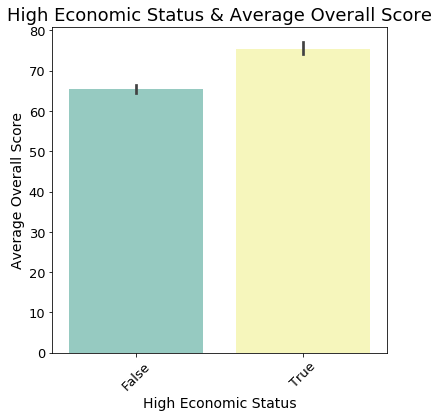

In [88]:
plt.figure(figsize=(6,6))
sns.barplot(x = "High_Economic_Status", y = "Average_Overall_Score", data = examData, palette="Set3")
plt.xticks(rotation=45)
plt.ylabel("Average Overall Score", fontsize=14)
plt.xlabel("High Economic Status", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('High Economic Status & Average Overall Score', fontsize=18)
plt.show()

In [89]:
examData.groupby(['Gender', 'High_Economic_Status']).count()

Race  Parental_Level_of_Education  Lunch  \
Gender High_Economic_Status                                             
female False                  404                          404    404   
       True                   114                          114    114   
male   False                  369                          369    369   
       True                   113                          113    113   

                             Test_Preparation_Course  Math_Score  \
Gender High_Economic_Status                                        
female False                                     404         404   
       True                                      114         114   
male   False                                     369         369   
       True                                      113         113   

                             Reading_Score  Writing_Score  \
Gender High_Economic_Status                                 
female False                           404            404   
       True                            114            114   
male   False                           369            369   
       True                            113            113   

                             Average_Overall_Score  Percentile_%  \
Gender High_Economic_Status                                        
female False                                   404           404   
       True                                    114           114   
male   False                                   369           369   
       True                                    113           113   

                             Parental_Degree  
Gender High_Economic_Status                   
female False                             404  
       True                              114  
male   False                             369  
       True                              113

In [90]:
examData['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [91]:
percentHighStatusFemales = 114 / 518 * 100
percentHighStatusFemales

22.00772200772201

In [92]:
percentHighStatusMales = 113 / 482 * 100
percentHighStatusMales

23.443983402489625

Could say you are more likely to be of higher status as a male, in reality it could be because males are more likely to take a prep course ect. 

## Score Correlation

In [93]:
examData['Prep_Course'] = np.where((examData["Test_Preparation_Course"]=='none'), False, True)

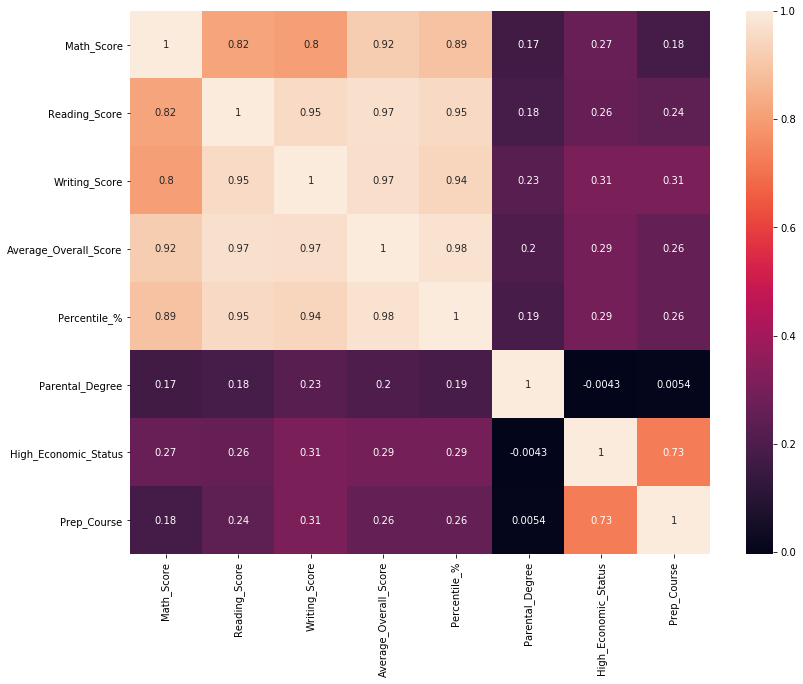

In [94]:
plt.figure(figsize=(13,10))
sns.heatmap(examData.corr(), annot=True)

Compared to the other scores, having taken a prep course is more correlated with an increased writing score.  

### Math Score vs Reading Score

In [95]:
examData[['Math_Score', 'Reading_Score']].cov()

,Math_Score,Reading_Score
Math_Score,229.918998,180.998958
Reading_Score,180.998958,213.165605


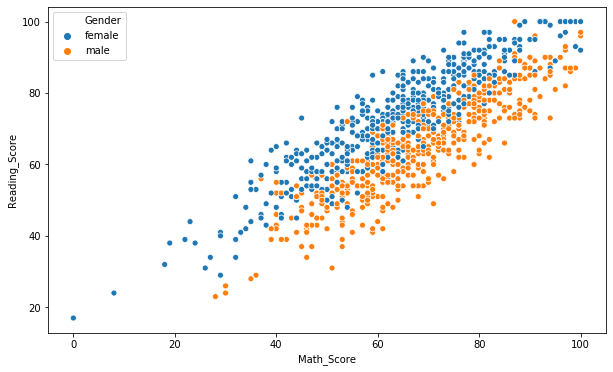

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Math_Score', y='Reading_Score', data=examData, hue="Gender")
plt.show()

### Math Score vs Writing Score

In [97]:
examData[['Math_Score', 'Writing_Score']].cov()

,Math_Score,Writing_Score
Math_Score,229.918998,184.939133
Writing_Score,184.939133,230.907992


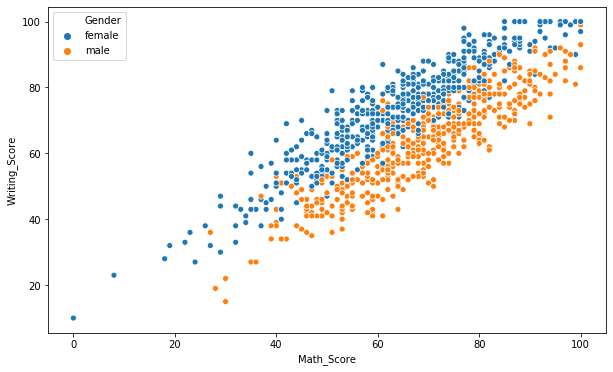

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Math_Score', y='Writing_Score', data=examData, hue="Gender")
plt.show()

### Reading Score vs Writing Score

In [99]:
examData[['Reading_Score', 'Writing_Score']].cov()

,Reading_Score,Writing_Score
Reading_Score,213.165605,211.786661
Writing_Score,211.786661,230.907992


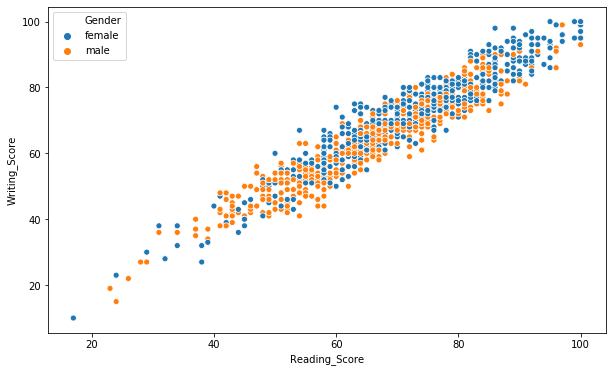

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reading_Score', y='Writing_Score', data=examData, hue="Gender")
plt.show()

There is a **greater correlation between Reading Score and Writing Score** compared to the Math Score and either Reading or Writing Score.

## Linear Regression

In [101]:
import statsmodels.formula.api as smf 

In [102]:
examData.head()

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Overall_Score,Percentile_%,Parental_Degree,High_Economic_Status,Prep_Course
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,61.75,True,False,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,84.10,True,True,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,96.90,True,False,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,9.85,True,False,False
4,male,group C,some college,standard,none,76,78,75,76.333333,71.65,True,False,False


### Average Overall Score -Linear Regression by Gender, Race, Parental Level of Education, Prep Course and Lunch

In [103]:
overallScore_reg = smf.ols("Average_Overall_Score ~ Gender + Race + C(Test_Preparation_Course, Treatment(reference='none')) + C(Parental_Level_of_Education, Treatment(reference='some high school')) + Lunch", data=examData).fit()
overallScore_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Average_Overall_Score   R-squared:                       0.242
Model:                               OLS   Adj. R-squared:                  0.233
Method:                    Least Squares   F-statistic:                     26.30
Date:                   Sun, 10 May 2020   Prob (F-statistic):           7.55e-52
Time:                           15:39:33   Log-Likelihood:                -3937.0
No. Observations:                   1000   AIC:                             7900.
Df Residuals:                        987   BIC:                             7964.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                        54.7622      1.710     32.032      0.000      51.407      58.117
Gender[T.male]                                                                                   -3.7242      0.795     -4.682      0.000      -5.285      -2.163
Race[T.group B]                                                                                   1.5290      1.612      0.949      0.343      -1.634       4.691
Race[T.group C]                                                                                   2.3855      1.509      1.581      0.114      -0.576       5.347
Race[T.group D]                                                                                   5.1258      1.540      3.329      0.001       2.104       8.147
Race[T.group E]                                                                                   6.9285      1.708      4.056      0.000       3.577      10.280
C(Test_Preparation_Course, Treatment(reference='none'))[T.completed]                              7.6386      0.830      9.201      0.000       6.009       9.268
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.associate's degree]     4.5400      1.264      3.592      0.000       2.060       7.020
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.bachelor's degree]      7.0756      1.485      4.765      0.000       4.162       9.989
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.high school]           -0.6325      1.300     -0.486      0.627      -3.184       1.919
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.master's degree]        8.6322      1.887      4.574      0.000       4.929      12.335
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.some college]           3.6124      1.256      2.875      0.004       1.147       6.078
Lunch[T.standard]                                                                                 8.7751      0.827     10.605      0.000       7.151      10.399
==============================================================================
Omnibus:                       12.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.915
Skew:                          -0.274   Prob(JB):                      0.00157
Kurtosis:                       2.897   Cond. No.                         11.8
===============================================================

### Predicting Average Overall Score for Female students with varying levels of Parental Education

In [104]:
new_students = pd.DataFrame({'Gender': ['female', 'female', 'female', 'female', 'female', 'female'], 'Race': ['group C', 'group C', 'group C', 'group C','group C', 'group C'], 
                                  'Parental_Level_of_Education': ["bachelor's degree","associate's degree", "master's degree", "some college", "high school", "some high school"],
                                'Lunch' : ['standard', 'standard', 'standard', 'standard', 'standard', 'standard'],
                                 'Test_Preparation_Course': ['completed', 'completed', 'completed', 'completed', 'completed', 'completed' ]
                            })
new_students

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course
0,female,group C,bachelor's degree,standard,completed
1,female,group C,associate's degree,standard,completed
2,female,group C,master's degree,standard,completed
3,female,group C,some college,standard,completed
4,female,group C,high school,standard,completed
5,female,group C,some high school,standard,completed


In [105]:
new_students['Predicted_Average_Overall_Score'] = overallScore_reg.predict(new_students)
new_students

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Predicted_Average_Overall_Score
0,female,group C,bachelor's degree,standard,completed,80.637040
1,female,group C,associate's degree,standard,completed,78.101402
2,female,group C,master's degree,standard,completed,82.193625
3,female,group C,some college,standard,completed,77.173867
4,female,group C,high school,standard,completed,72.928908
5,female,group C,some high school,standard,completed,73.561426


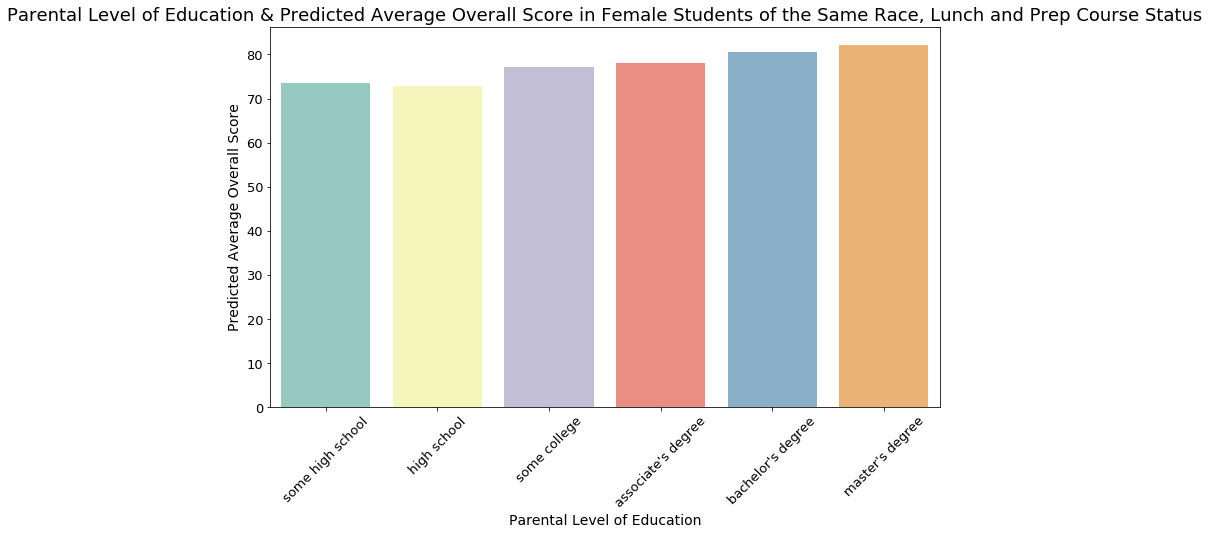

In [106]:
plt.figure(figsize=(12,7))
sns.barplot(x = "Parental_Level_of_Education", y = "Predicted_Average_Overall_Score", data = new_students, palette="Set3", order=['some high school', 'high school', 'some college',"associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=45)
plt.ylabel("Predicted Average Overall Score", fontsize=14)
plt.xlabel("Parental Level of Education", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Parental Level of Education & Predicted Average Overall Score in Female Students of the Same Race, Lunch and Prep Course Status', fontsize=18)
plt.show()

## Predicting Average Overall Score based on Race/Ethnicity

In [107]:
new_students2 = pd.DataFrame({'Gender': ['male', 'male', 'male', 'male', 'male'], 'Race': ['group A', 'group B', 'group C', 'group D','group E'], 
                                  'Parental_Level_of_Education': ["bachelor's degree","bachelor's degree", "bachelor's degree", "bachelor's degree", "bachelor's degree"],
                                'Lunch' : ['standard', 'standard', 'standard', 'standard', 'standard'],
                                 'Test_Preparation_Course': ['completed', 'completed', 'completed', 'completed', 'completed']
                            })
new_students2

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course
0,male,group A,bachelor's degree,standard,completed
1,male,group B,bachelor's degree,standard,completed
2,male,group C,bachelor's degree,standard,completed
3,male,group D,bachelor's degree,standard,completed
4,male,group E,bachelor's degree,standard,completed


In [108]:
new_students2['Predicted_Average_Overall_Score'] = overallScore_reg.predict(new_students2)
new_students2

,Gender,Race,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Predicted_Average_Overall_Score
0,male,group A,bachelor's degree,standard,completed,74.527352
1,male,group B,bachelor's degree,standard,completed,76.056328
2,male,group C,bachelor's degree,standard,completed,76.912855
3,male,group D,bachelor's degree,standard,completed,79.653128
4,male,group E,bachelor's degree,standard,completed,81.455873


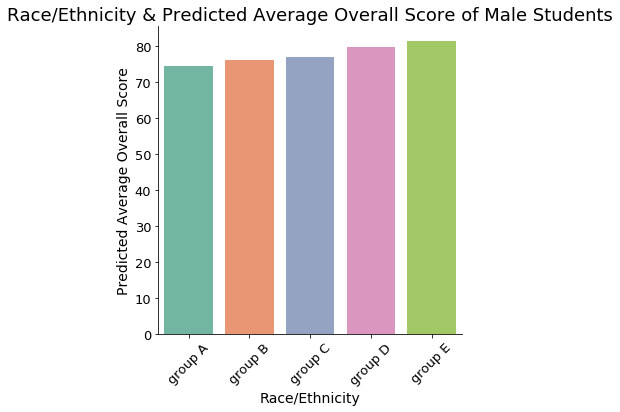

In [109]:
sns.catplot(data=new_students2, x='Race', y='Predicted_Average_Overall_Score', kind = 'bar', order=['group A', 'group B', 'group C', 'group D', 'group E'], palette="Set2")
plt.xticks(rotation=45)
plt.ylabel("Predicted Average Overall Score", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=14)
plt.tick_params(labelsize=13)
plt.title('Race/Ethnicity & Predicted Average Overall Score of Male Students', fontsize=18)
plt.show()

### Math Score regression 

In [110]:
mathScore_reg = smf.ols("Math_Score ~ Gender + Lunch + Race + C(Test_Preparation_Course, Treatment(reference='none')) + C(Parental_Level_of_Education, Treatment(reference='some high school'))", data=examData).fit()
mathScore_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Math_Score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.62e-55
Time:                        15:39:35   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                        47.8872      1.803     26.557      0.000      44.349      51.426
Gender[T.male]                                                                                    4.9953      0.839      5.954      0.000       3.349       6.642
Lunch[T.standard]                                                                                10.8768      0.873     12.463      0.000       9.164      12.589
Race[T.group B]                                                                                   2.0408      1.700      1.201      0.230      -1.295       5.376
Race[T.group C]                                                                                   2.4700      1.592      1.552      0.121      -0.654       5.594
Race[T.group D]                                                                                   5.3410      1.624      3.289      0.001       2.154       8.528
Race[T.group E]                                                                                  10.1347      1.802      5.626      0.000       6.599      13.670
C(Test_Preparation_Course, Treatment(reference='none'))[T.completed]                              5.4947      0.876      6.275      0.000       3.776       7.213
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.associate's degree]     4.2487      1.333      3.187      0.001       1.633       6.865
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.bachelor's degree]      6.2148      1.566      3.969      0.000       3.142       9.288
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.high school]           -0.5540      1.371     -0.404      0.686      -3.245       2.137
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.master's degree]        7.1371      1.990      3.586      0.000       3.231      11.043
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.some college]           3.6660      1.325      2.767      0.006       1.066       6.266
==============================================================================
Omnibus:                        9.026   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.201
Skew:                          -0.232   Prob(JB):                       0.0100
Kurtosis:                       2.928   Cond. No.                         11.8
==============================================================================

Warnings:
[1] St

In [111]:
mathScore_reg2 = smf.ols("Math_Score ~ Reading_Score + Writing_Score", data=examData).fit()
mathScore_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Math_Score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 10 May 2020   Prob (F-statistic):          2.25e-243
Time:                        15:39:35   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5241      1.328      5.665      0.000       4.918      10.131
Reading_Score     0.6013      0.063      9.538      0.000       0.478       0.725
Writing_Score     0.2494      0.061      4.118      0.000       0.131       0.368
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Reading Score regression

In [112]:
readingScore_reg = smf.ols("Reading_Score ~ Gender + Lunch + Race + C(Test_Preparation_Course, Treatment(reference='none')) + C(Parental_Level_of_Education, Treatment(reference='some high school')) -1", data=examData).fit()
readingScore_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Reading_Score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.62e-48
Time:                        15:39:35   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Gender[female]                                                                                   59.8661      1.768     33.862      0.000      56.397      63.335
Gender[male]                                                                                     52.7947      1.738     30.383      0.000      49.385      56.205
Lunch[T.standard]                                                                                 7.2458      0.856      8.468      0.000       5.567       8.925
Race[T.group B]                                                                                   1.3260      1.667      0.796      0.426      -1.944       4.596
Race[T.group C]                                                                                   2.2739      1.561      1.457      0.145      -0.789       5.337
Race[T.group D]                                                                                   4.1056      1.592      2.578      0.010       0.981       7.230
Race[T.group E]                                                                                   5.5135      1.766      3.121      0.002       2.047       8.980
C(Test_Preparation_Course, Treatment(reference='none'))[T.completed]                              7.3625      0.859      8.576      0.000       5.678       9.047
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.associate's degree]     4.0490      1.307      3.098      0.002       1.484       6.614
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.bachelor's degree]      6.2050      1.535      4.041      0.000       3.192       9.218
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.high school]           -0.8514      1.345     -0.633      0.527      -3.490       1.787
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.master's degree]        8.2541      1.951      4.230      0.000       4.425      12.084
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.some college]           2.7695      1.299      2.132      0.033       0.220       5.319
==============================================================================
Omnibus:                       11.191   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.258
Skew:                          -0.242   Prob(JB):                      0.00359
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Warnings:
[1] St

In [113]:
readingScore_reg2 = smf.ols("Reading_Score ~ Math_Score + Writing_Score", data=examData).fit()
readingScore_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Reading_Score   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     5631.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        15:39:35   Log-Likelihood:                -2844.8
No. Observations:                1000   AIC:                             5696.
Df Residuals:                     997   BIC:                             5710.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1398      0.628      8.182      0.000       3.907       6.373
Math_Score        0.1391      0.015      9.538      0.000       0.110       0.168
Writing_Score     0.8058      0.015     55.389      0.000       0.777       0.834
==============================================================================
Omnibus:                        4.939   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.898
Skew:                          -0.146   Prob(JB):                       0.0864
Kurtosis:                       2.821   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Writing Score regression

In [114]:
writingScore_reg = smf.ols("Writing_Score ~ Gender + Lunch + Race + C(Test_Preparation_Course, Treatment(reference='none')) + C(Parental_Level_of_Education, Treatment(reference='some high school'))", data=examData).fit()
writingScore_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Writing_Score   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     41.25
Date:                Sun, 10 May 2020   Prob (F-statistic):           8.17e-79
Time:                        15:39:35   Log-Likelihood:                -3936.2
No. Observations:                1000   AIC:                             7898.
Df Residuals:                     987   BIC:                             7962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                        56.5333      1.708     33.094      0.000      53.181      59.886
Gender[T.male]                                                                                   -9.0965      0.795    -11.444      0.000     -10.656      -7.537
Lunch[T.standard]                                                                                 8.2028      0.827      9.921      0.000       6.580       9.825
Race[T.group B]                                                                                   1.2201      1.610      0.758      0.449      -1.940       4.380
Race[T.group C]                                                                                   2.4126      1.508      1.600      0.110      -0.547       5.372
Race[T.group D]                                                                                   5.9307      1.539      3.855      0.000       2.911       8.950
Race[T.group E]                                                                                   5.1373      1.707      3.010      0.003       1.788       8.487
C(Test_Preparation_Course, Treatment(reference='none'))[T.completed]                             10.0587      0.830     12.125      0.000       8.431      11.687
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.associate's degree]     5.3222      1.263      4.214      0.000       2.844       7.801
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.bachelor's degree]      8.8071      1.484      5.936      0.000       5.896      11.718
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.high school]           -0.4921      1.299     -0.379      0.705      -3.042       2.057
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.master's degree]       10.5054      1.886      5.571      0.000       6.805      14.206
C(Parental_Level_of_Education, Treatment(reference='some high school'))[T.some college]           4.4018      1.255      3.506      0.000       1.938       6.865
==============================================================================
Omnibus:                       16.647   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.222
Skew:                          -0.321   Prob(JB):                     0.000182
Kurtosis:                       2.982   Cond. No.                         11.8
==============================================================================

Warnings:
[1] St

In [115]:
writingScore_reg2 = smf.ols("Writing_Score ~ Reading_Score + Math_Score", data=examData).fit()
writingScore_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Writing_Score   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5214.
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        15:39:36   Log-Likelihood:                -2920.0
No. Observations:                1000   AIC:                             5846.
Df Residuals:                     997   BIC:                             5861.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1608      0.699     -1.662      0.097      -2.532       0.210
Reading_Score     0.9366      0.017     55.389      0.000       0.903       0.970
Math_Score        0.0670      0.016      4.118      0.000       0.035       0.099
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.709
Skew:                           0.087   Prob(JB):                        0.426
Kurtosis:                       2.896   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""